<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
# normalizar datos en columna 'species' y reemplazar valores nan por 'default'
df['species'] = df['species'].str.lower().str.strip().fillna('default')
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa
146,4.8,3.0,1.4,0.1,setosa
147,4.9,3.1,1.5,0.1,setosa
148,4.9,3.6,1.4,0.1,setosa


In [4]:
# conteo de datos diferentes en esta columna
print(df['species'].unique())
grupo = df.groupby('species')
grupo = grupo[['sepalLength']].count().reset_index() #se elige cualquier otra columna para contar
grupo = grupo.rename(columns={'sepalLength':'cantidad'})
grupo

['setosa' 'virginica' 'versicolor' 'default']


,species,cantidad
0,default,1
1,setosa,50
2,versicolor,48
3,virginica,50


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

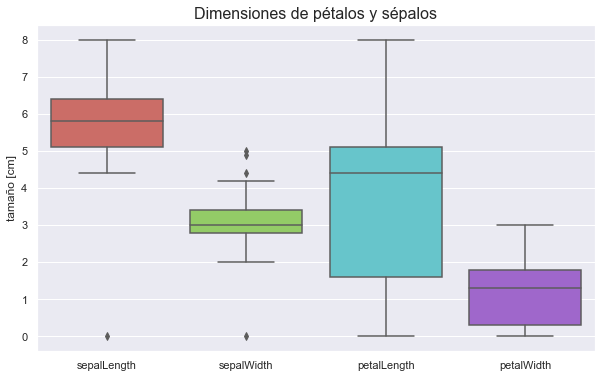

In [5]:
# cambiar valores nan por cero
df = df.fillna(0)
# crear nuevo dataframe para graficar eliminando la columna 'species'
datos = df.drop('species',axis=1)

sns.set(rc={'figure.figsize':(10,6)})
palette = sns.color_palette("hls", 4)
sns.boxplot(
    data = datos,
    palette = palette  
)
a = plt.ylabel("tamaño [cm]")
c = plt.title("Dimensiones de pétalos y sépalos",size = 16)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [6]:
# se preparan los filtros 
# largo de cépalos
mask_sepLen_inf = df['sepalLength']>=4.0
mask_sepLen_sup = df['sepalLength']<=7.0
mask_sepLen = mask_sepLen_inf & mask_sepLen_sup
# ancho de cépalos
mask_sepWid_inf = df['sepalWidth']>=2.0
mask_sepWid_sup = df['sepalWidth']<=4.5
mask_sepWid = mask_sepWid_inf & mask_sepWid_sup
# largo de pétalos
mask_petLen_inf = df['petalLength']>=1.0
mask_petLen_sup = df['petalLength']<=7.0
mask_petLen = mask_petLen_inf & mask_petLen_sup
#ancho de pétalos
mask_petWid_inf = df['petalWidth']>=0.1
mask_petWid_sup = df['petalWidth']<=2.5
mask_petWid = mask_petWid_inf & mask_petWid_sup

# crear filtro final
mask = mask_sepLen & mask_sepWid & mask_petLen & mask_petWid
df_filt = df
# crear nueva columna
df_filt.loc[:,'label'] = 'fuera de rango'
# identificar los datos validos
df_filt.loc[mask,'label'] = 'valido'
df_filt.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,fuera de rango
1,7.2,3.6,6.1,2.5,virginica,fuera de rango
2,6.3,3.3,6.0,2.5,virginica,valido
3,6.7,3.3,5.7,2.5,virginica,valido
4,6.3,3.4,5.6,2.4,virginica,valido


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

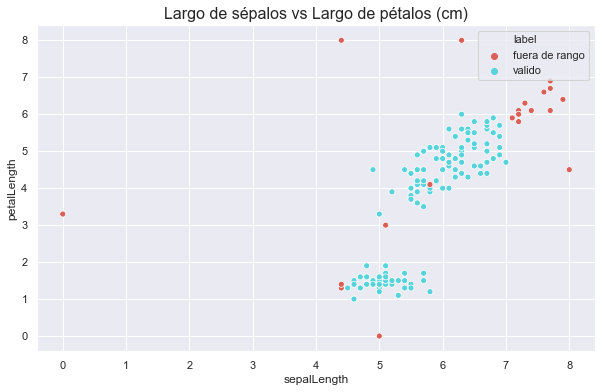

In [7]:
palette = sns.color_palette("hls", 2)

sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue='label',
    data=df_filt,
    ci = None,
    palette=palette
)
c = plt.title("Largo de sépalos vs Largo de pétalos (cm)",size = 16)

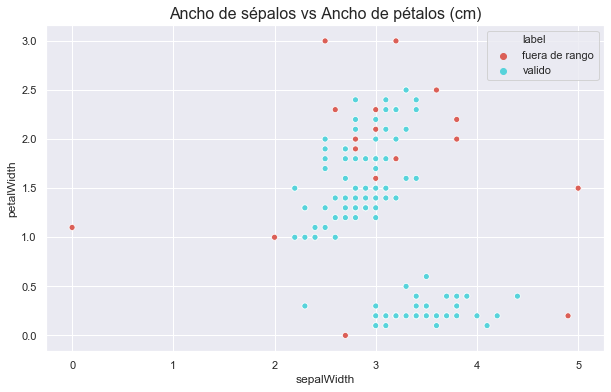

In [8]:
palette = sns.color_palette("hls", 2)

sns.scatterplot(
    x='sepalWidth',
    y='petalWidth',
    hue='label',
    data=df_filt,
    ci = None,
    palette=palette
)
c = plt.title("Ancho de sépalos vs Ancho de pétalos (cm)",size = 16)

Existen al menos dos tendencias marcadas en cuanto a los pares ordenados (dim sépalos, dim pétalos) para ambas dimensiones (ancho y largo). Se podría especular que dichas magnitudes dependen de la especie de iris a la que pertenece. 
Los datos fuera de rango dan a pensar que se sigue la tendencia en el caso del gráfico de ancho de sépalos vs ancho de pétalos. 
(Recordar que se le dio valor cero a datos no registrados)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [9]:
# crear un dataframe que no contenga datos fuera de rango
df_final = df_filt[df_filt['label']=='valido'].reset_index(drop=True)
df_final.head()


,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,6.3,3.3,6.0,2.5,virginica,valido
1,6.7,3.3,5.7,2.5,virginica,valido
2,6.3,3.4,5.6,2.4,virginica,valido
3,6.7,3.1,5.6,2.4,virginica,valido
4,5.8,2.8,5.1,2.4,virginica,valido


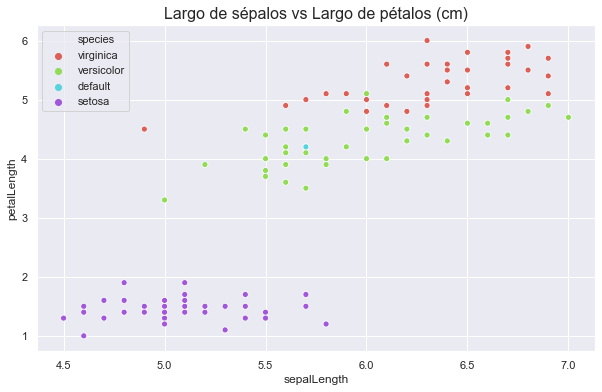

In [10]:
# se realiza un grafico de dispersión largo pétalos vs largo cépalos
palette = sns.color_palette("hls", 4)

sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue='species',
    data=df_final,
    ci = None,
    palette=palette
)
c = plt.title("Largo de sépalos vs Largo de pétalos (cm)",size = 16)

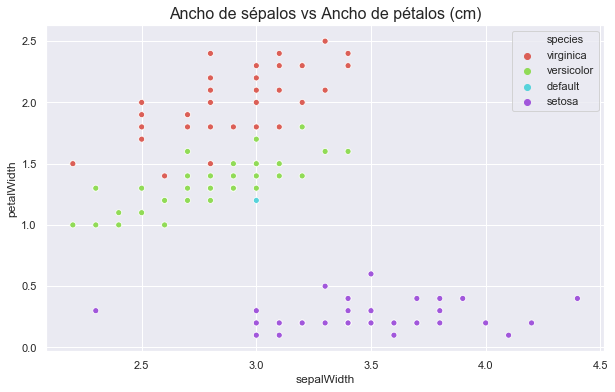

In [11]:
#se graficarán también los anchos
palette = sns.color_palette("hls", 4)

sns.scatterplot(
    x='sepalWidth',
    y='petalWidth',
    hue='species',
    data=df_final,
    ci = None,
    palette=palette
)
c = plt.title("Ancho de sépalos vs Ancho de pétalos (cm)",size = 16)

Ahora se puede observar mas fácilmente que especies presentan cuáles dimensiones. Se podría concluir que la medición a la cual no se le registró la especie (tipo default dado en Pregunta 1) corresponderia a la especie Iris Versicolor. Esto se se puede aplicar también a futuros datos de especie desconocida, siendo más fácil discernir si el nuevo dato es setosa que virginica o versicolor.